In [1]:
import pandas as pd
data=pd.read_csv('Fake_Real_Data.csv')
data.head()

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [2]:
data.label.value_counts()

label
Fake    5000
Real    4900
Name: count, dtype: int64

In [3]:
min_samples=4900
df_fake=data[data.label=='Fake'].sample(min_samples,random_state=2022)
df_real=data[data.label=='Real'].sample(min_samples,random_state=2022)


In [5]:
balanced_data=pd.concat([df_fake,df_real])
print(balanced_data.label.value_counts())

balanced_data.head()

label
Fake    4900
Real    4900
Name: count, dtype: int64


,Text,label
6715,"Trump Throws An EPIC, Brain-Melting Tantrum A...",Fake
356,GOP Senator Just Smacked Down The Most Puncha...,Fake
7317,Trump Was Just Busted For Daydreaming At G20 ...,Fake
6051,These Banks Are Fighting The Cycle Of Poverty...,Fake
7257,Trump Jr. Forced To Admit To Meeting With Sha...,Fake


In [6]:
balanced_data['label_num']=balanced_data.label.map({
    'Fake':0,
    'Real':1
})

In [7]:
balanced_data.head()

,Text,label,label_num
6715,"Trump Throws An EPIC, Brain-Melting Tantrum A...",Fake,0
356,GOP Senator Just Smacked Down The Most Puncha...,Fake,0
7317,Trump Was Just Busted For Daydreaming At G20 ...,Fake,0
6051,These Banks Are Fighting The Cycle Of Poverty...,Fake,0
7257,Trump Jr. Forced To Admit To Meeting With Sha...,Fake,0


In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(
    balanced_data.Text,
    balanced_data.label_num,
    test_size=0.2,
    random_state=2022,
    stratify=balanced_data.label_num
    )

In [9]:
X_train.shape

(7840,)

In [10]:
X_test.shape

(1960,)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from  sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

clf=Pipeline([
    ('vectorizer_trigrams',CountVectorizer(ngram_range=(1,3))),# for trigram
    ('KNN',(KNeighborsClassifier(n_neighbors=10, metric = 'euclidean')))
])

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.46      0.62       980
           1       0.65      0.98      0.78       980

    accuracy                           0.72      1960
   macro avg       0.80      0.72      0.70      1960
weighted avg       0.80      0.72      0.70      1960



In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from  sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

clf=Pipeline([
    ('vectorizer_trigrams',CountVectorizer(ngram_range=(1,3))),# for trigram
    ('KNN',(KNeighborsClassifier(n_neighbors=10, metric = 'cosine')))
])

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.56      0.71       980
           1       0.69      1.00      0.82       980

    accuracy                           0.78      1960
   macro avg       0.85      0.78      0.77      1960
weighted avg       0.85      0.78      0.77      1960



In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

clf=Pipeline([
    ('vectorizer_trigrams',CountVectorizer(ngram_range=(3,3))),# for trigram
    ('Random Forest',RandomForestClassifier())
])

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       0.99      1.00      0.99       980

    accuracy                           0.99      1960
   macro avg       0.99      0.99      0.99      1960
weighted avg       0.99      0.99      0.99      1960



In [15]:
from sklearn.naive_bayes import MultinomialNB


#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_trigrams', CountVectorizer(ngram_range = (1, 2))),        #using the ngram_range parameter 
     ('Multi NB', MultinomialNB(alpha = 0.75))         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.98      0.99       980

    accuracy                           0.99      1960
   macro avg       0.99      0.99      0.99      1960
weighted avg       0.99      0.99      0.99      1960



In [16]:
import spacy
nlp = spacy.load("en_core_web_sm") 

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 

In [17]:
balanced_data['preprocessed_text']=balanced_data.Text.apply(preprocess)

In [18]:
balanced_data.head()

,Text,label,label_num,preprocessed_text
6715,"Trump Throws An EPIC, Brain-Melting Tantrum A...",Fake,0,Trump throw EPIC Brain Melting Tantrum Putin...
356,GOP Senator Just Smacked Down The Most Puncha...,Fake,0,GOP Senator Smacked Punchable Alt right nazi...
7317,Trump Was Just Busted For Daydreaming At G20 ...,Fake,0,trump busted Daydreaming G20 Meeting Humilia...
6051,These Banks Are Fighting The Cycle Of Poverty...,Fake,0,Banks fight cycle Poverty Places Major Banks...
7257,Trump Jr. Forced To Admit To Meeting With Sha...,Fake,0,Trump Jr. force admit Meeting Shady Russian ...


In [19]:
X_train,X_test,y_train,y_test=train_test_split(
    balanced_data.preprocessed_text,
    balanced_data.label_num,
    test_size=0.2,
    random_state=2022,
    stratify=balanced_data.label_num
    
)

In [20]:
clf = Pipeline([
    ('vectorizer_n_grams', CountVectorizer(ngram_range = (3, 3))),                       #using the ngram_range parameter 
    ('random_forest', (RandomForestClassifier()))         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       980
           1       0.98      0.92      0.95       980

    accuracy                           0.95      1960
   macro avg       0.95      0.95      0.95      1960
weighted avg       0.95      0.95      0.95      1960



In [21]:
clf = Pipeline([
    ('vectorizer_n_grams', CountVectorizer(ngram_range = (1, 3))),                       #using the ngram_range parameter 
    ('random_forest', (RandomForestClassifier()))         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       0.99      1.00      1.00       980

    accuracy                           1.00      1960
   macro avg       1.00      1.00      1.00      1960
weighted avg       1.00      1.00      1.00      1960



Text(95.72222222222221, 0.5, 'Truth')

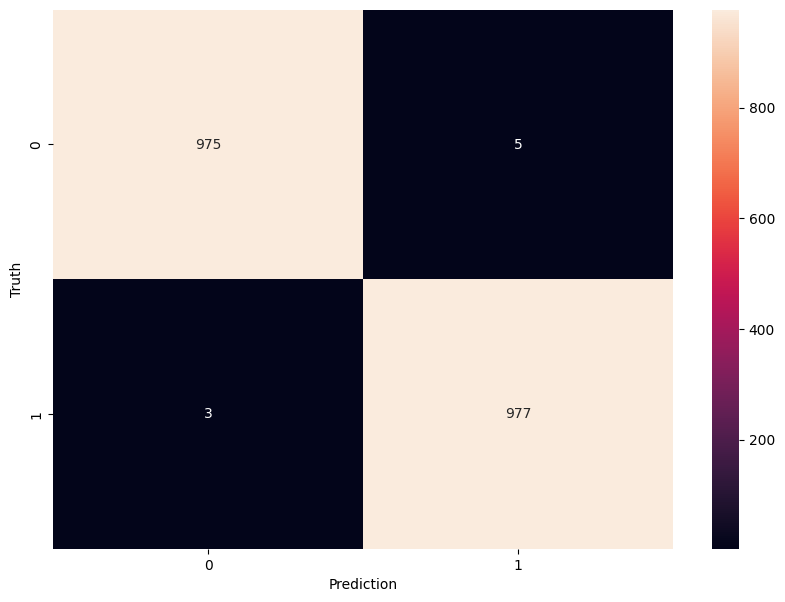

In [22]:
#finally print the confusion matrix for the best model

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')